<a href="https://colab.research.google.com/github/sikha2552/Neural-Networks-Deep-Learning_Keras/blob/main/EX_7_CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Convolutional Neural Networks (CNN)**
**This notebook includes the folllwoing experiments**

### 1.Basic Image Processing
### 2.Image Classification using Sequential models (Hanwriting Recognition)
### 3.Image Classification using CNN (Hanwriting Recognition)
### 4.Visualizing Convolution Features
### 5.Convolution In Scratch.

### **Excercise1:Basic Image Processing**

1.  Basic I/O operations on Image (Read, Display, Write, Flip, and Rotate)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
image_path='/content/drive/MyDrive/NN_DL/Lab8_CNN1/baboon.png'

Size of the image is (512, 512, 3)


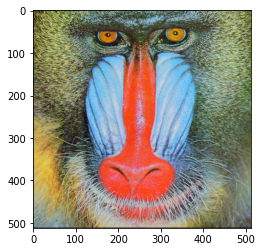

In [ ]:
image=plt.imread(image_path)
plt.imshow(image)
print("Size of the image is {}".format(image.shape))

In [ ]:
image

array([[[0.6431373 , 0.5882353 , 0.2784314 ],
        [0.24705882, 0.22352941, 0.12156863],
        [0.29411766, 0.16862746, 0.03921569],
        ...,
        [0.45882353, 0.46666667, 0.26666668],
        [0.5529412 , 0.6666667 , 0.39607844],
        [0.7019608 , 0.7372549 , 0.4627451 ]],

       [[0.47058824, 0.49019608, 0.24313726],
        [0.5294118 , 0.38039216, 0.12941177],
        [0.21568628, 0.13725491, 0.09019608],
        ...,
        [0.47843137, 0.54901963, 0.38431373],
        [0.53333336, 0.62352943, 0.5019608 ],
        [0.47058824, 0.5411765 , 0.2901961 ]],

       [[0.3882353 , 0.2901961 , 0.12156863],
        [0.5176471 , 0.4627451 , 0.18039216],
        [0.23529412, 0.16078432, 0.14117648],
        ...,
        [0.4627451 , 0.3647059 , 0.3529412 ],
        [0.34117648, 0.35686275, 0.3019608 ],
        [0.3764706 , 0.3137255 , 0.19215687]],

       ...,

       [[0.4745098 , 0.5803922 , 0.60784316],
        [0.48235294, 0.6117647 , 0.5882353 ],
        [0.4862745 , 0

In [ ]:
red=image[:,:,0]
blue=image[:,:,1]
green=image[:,:,2]
print("Shape of red channel {}".format(red.shape))
print("Shape of green channel {}".format(green.shape))
print("Shape of bluechannel {}".format(blue.shape))

Shape of red channel (512, 512)
Shape of green channel (512, 512)
Shape of bluechannel (512, 512)


Text(0.5, 1.0, 'Blue channel')

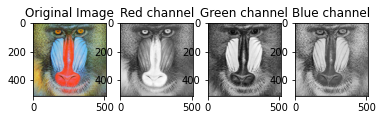

In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 4, 2)
plt.title('Red channel')
plt.imshow(red,cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(green,cmap='gray')
plt.title('Green channel')
plt.subplot(1,4, 4)
plt.imshow(blue,cmap='gray')
plt.title('Blue channel')

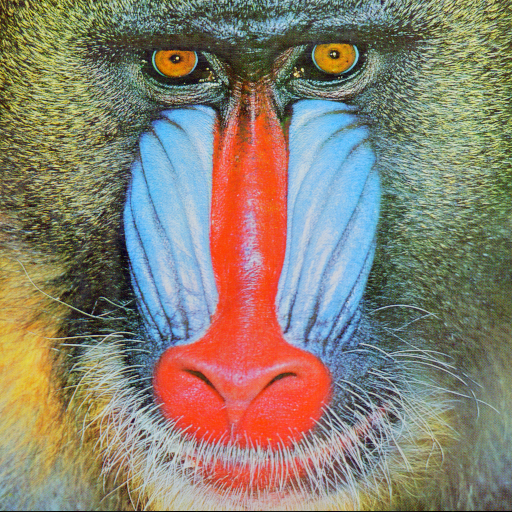

In [ ]:
#cv2 library can also be used to read and process images
# cv2 reads the image in bgr
# using cv2 we are reading image and plotting with matplotlib
# convert the cv2 image that was in bgr into rgb format
from google.colab.patches import cv2_imshow
cv_bimg=cv2.imread(image_path)
cv2_imshow(cv_bimg)

What is the difference between cv2.imahow and plt.imshow?

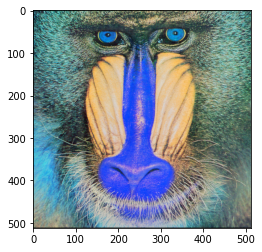

In [ ]:
plt.imshow(cv_bimg)

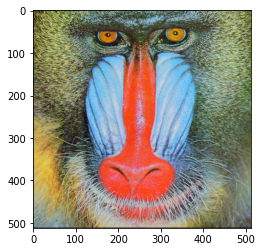

In [ ]:
cvrgb=cv2.cvtColor(cv_bimg,cv2.COLOR_BGR2RGB)
plt.imshow(cvrgb)

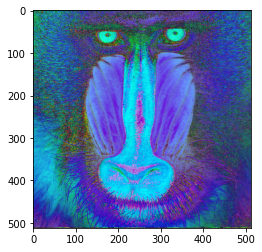

In [ ]:
cvhsv=cv2.cvtColor(cv_bimg,cv2.COLOR_BGR2HSV)
plt.imshow(cvhsv)

### **Excercise 2: Image Classification using Sequential Models**

In [9]:
#Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
#Download data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [11]:
print("Tain set size {}".format(x_train.shape))
print("Test set size{}".format(x_test.shape))

Tain set size (60000, 28, 28)
Test set size(10000, 28, 28)


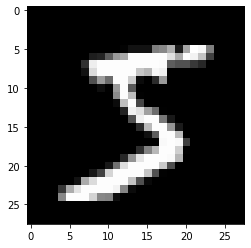

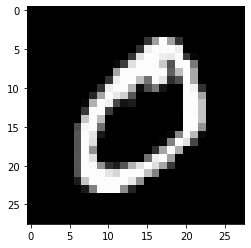

In [ ]:
#Disaply sample images
import matplotlib.pyplot as plt
for i in range(2):
  plt.imshow(x_train[i],cmap='gray')
  plt.show()

In [ ]:
#normalize the data
x_train=x_train/255
x_test=x_test/255

In [ ]:
#Construct a sequential model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

### **OR**

In [3]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,Activation
model=Sequential()
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))


Working of SoftMax Activation function

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0114 - accuracy: 0.9965
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0082 - accuracy: 0.9973


In [ ]:
test_hist = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0661 - accuracy: 0.9804


In [ ]:
print(test_hist)

[0.06613533943891525, 0.980400025844574]


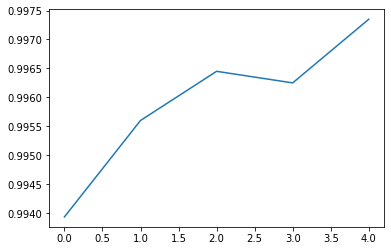

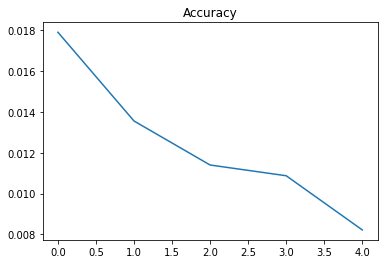

Text(0.5, 1.0, 'Loss')

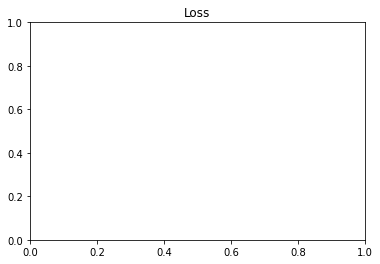

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()
plt.title('Accuracy')
plt.plot(history.history['loss'])
plt.show()
plt.title('Loss')

### **Excercise 3: Image Classification:CNN**

In [4]:
from keras.layers import Conv2D,MaxPool2D
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=[28,28,1]))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2362 - accuracy: 0.9551
Epoch 2/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0608 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0473 - accuracy: 0.9854
Epoch 4/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0407 - accuracy: 0.9876
Epoch 5/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0347 - accuracy: 0.9900


In [13]:
test_hist = model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0560 - accuracy: 0.9841


In [32]:
y_predict=model.predict(x_test)

In [39]:
predicted_classes = np.argmax(y_predict, axis=1)

In [40]:
print(predicted_classes)

[7 2 1 ... 4 5 6]


In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted_classes))

[[ 974    1    0    0    1    0    2    1    1    0]
 [   0 1126    0    0    0    2    3    1    3    0]
 [   2    4 1010    1    0    0    1    8    5    1]
 [   0    0    1  993    0   12    0    1    3    0]
 [   0    0    0    0  973    0    0    0    4    5]
 [   1    0    0    3    0  882    1    1    4    0]
 [   0    3    0    0    1    8  935    0   11    0]
 [   0    3   13    1    3    0    0 1005    2    1]
 [   0    0    0    1    1    0    0    0  971    1]
 [   5    2    0    0    6    7    0    2   15  972]]


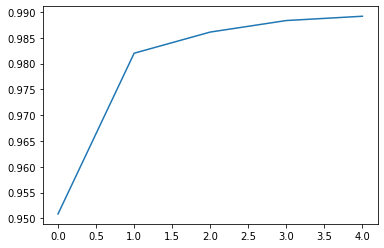

Text(0.5, 1.0, 'Loss')

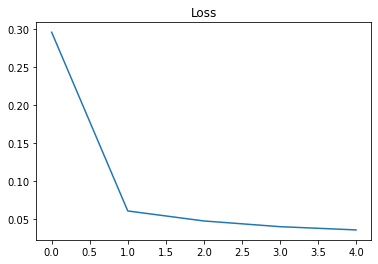

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()
plt.title('Accuracy')
plt.plot(history.history['loss'])
plt.title('Loss')

(480, 852, 3)
(28, 28, 1)


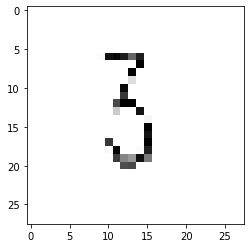

In [89]:
import cv2
from keras.preprocessing.image import img_to_array
new_img_path='/content/drive/MyDrive/NN_DL/Lab8_CNN1/3.jpg'
image = cv2.imread(new_img_path)
print(image.shape)
# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')
image = image.astype("float") / 255.0
image = img_to_array(image)
#image = np.expand_dims(image, axis=0)
print(image.shape)


In [90]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
#image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
yhat = model.predict(image)
print(yhat)

[[0.10474222 0.11206861 0.09538193 0.09401056 0.10136286 0.09647684
  0.09636676 0.09360407 0.10796691 0.09801921]]


In [93]:
# convert the probabilities to class labels
label = np.argmax(yhat)
# retrieve the most likely result, e.g. highest probability
#label = label[0][0]
# print the classification
print(label) 

1


The predicted Label is: 7


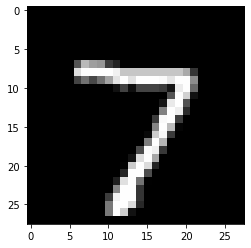

In [105]:
img=x_test[0]
plt.imshow(img,cmap='gray')
img = img.reshape((1, img.shape[0], img.shape[1]))
p=model.predict(img)
label=np.argmax(p)
print("The predicted Label is: {}".format(label))

### **Excercise 3: Visualizing Convolutions and Pooling**

In [115]:
print(y_test[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


In [116]:
#Getting names of layers of CNN
layer_names = [layer.name for layer in model.layers]
layer_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'flatten_1',
 'dense_2',
 'dense_3']

In [117]:
#Getting output of the layers of CNN: This returns the output objects of the layers.
layer_outputs = [layer.output for layer in model.layers]

In [118]:
#This step combines the input and putput functions of the CNN. Here we have 7 output functions(= number of layers in the CNN). 
#The image is taken as input and then that image is made to pass through all these 7 output functions one by one in serial order.
# The last output function is the output of the model itself. So, in total there are6 intermediate output functions and hence 6 intermediate feature maps.
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


In [119]:
#Prepare the image to give as an input into this activation_model. We are going to take 3 images from the test set for visualization.
#You can also load a custom image. In that case you need to converted it to an array, expanded the dimensions of the image to match 
#the dimensions of the intermediate layers
FIRST_IMAGE=0
SECOND_IMAGE=17
THIRD_IMAGE=26
feature_maps = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))


In [120]:
#Display the intermediate layer shape
for layer_name, feature_map in zip(layer_names, feature_maps):print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")


The shape of the conv2d is =======>> (1, 26, 26, 64)
The shape of the max_pooling2d is =======>> (1, 13, 13, 64)
The shape of the conv2d_1 is =======>> (1, 11, 11, 64)
The shape of the max_pooling2d_1 is =======>> (1, 5, 5, 64)
The shape of the flatten_1 is =======>> (1, 1600)
The shape of the dense_2 is =======>> (1, 128)
The shape of the dense_3 is =======>> (1, 10)


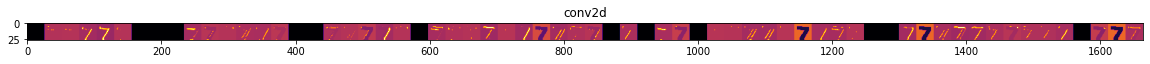

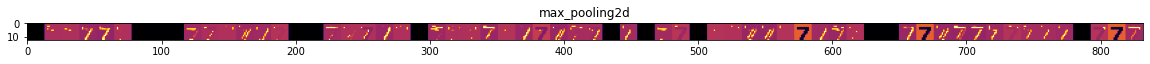

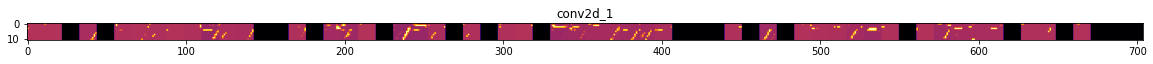

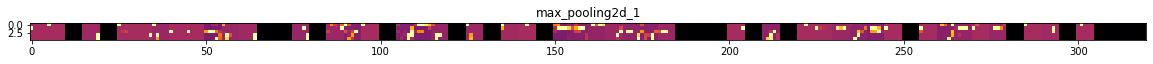

In [174]:
#We are looikng for the feature maps of convolutions and pooling and not dense layers. So, consider those layers with dimension 4
for layer_name, feature_map in zip(layer_names, feature_maps):   
  if len(feature_map.shape) == 4:                             # Number of feature images/dimensions in a feature map of a layer 
   k = feature_map.shape[-1] 
   size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
   # We will tile our images in this matrix
   display_grid = np.zeros((size, size * k))
   #iterating over a feature map of a particular layer to separate all feature images.    
   for i in range(k):
     x  = feature_map[0, :, :, i]
     x -= x.mean()
     x /= x.std ()
     x *=  64
     x += 128
     x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
     display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
   scale = 20. / n_features
   plt.figure( figsize=(scale * n_features, scale) )
   plt.title ( layer_name )
   plt.grid  ( False )
   plt.imshow( display_grid, aspect='auto', cmap='inferno' )
     

Feature maps of number 7 


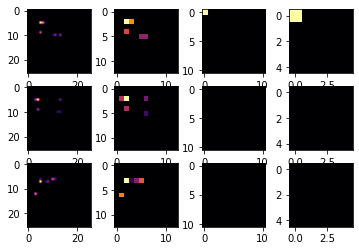

In [232]:
print("Feature maps of number 7 ")
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=17
THIRD_IMAGE=26
CONVOLUTION_NUMBER =1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
  

Feature maps of number 1 Convolution layer 2


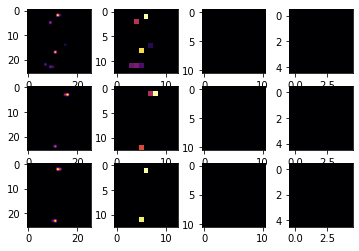

In [233]:
print("Feature maps of number 1 Convolution layer 2")
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=3
SECOND_IMAGE=5
THIRD_IMAGE=14
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
  

## **Excercise 4: Convolutions and Maxpooling From Scratch**

In [215]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()


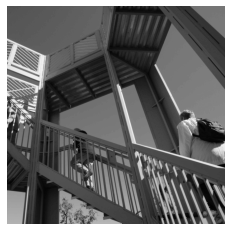

In [216]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [217]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [218]:
#Find the size of the image
size_x=i.shape[0]
size_y=i.shape[1]
print(size_x)
print(size_y)

512
512


Create a filter as a 3x3 array [**Vertical Edges**].

In [219]:
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [220]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x-1, y-1] * filter[0][0])
      convolution = convolution + (i[x-1, y] * filter[0][1])  
      convolution = convolution + (i[x-1, y+1] * filter[0][2])     
      convolution = convolution + (i[x, y-1] * filter[1][0])    
      convolution = convolution + (i[x, y] * filter[1][1])    
      convolution = convolution + (i[x, y+1] * filter[1][2])    
      convolution = convolution + (i[x+1, y-1] * filter[2][0])    
      convolution = convolution + (i[x+1, y] * filter[2][1])    
      convolution = convolution + (i[x+1, y+1] * filter[2][2])    
      convolution = convolution * weight   
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

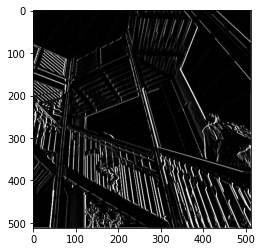

In [221]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

**Extract Horizontal Edges** 

In [229]:
#filter=[ [1,1, 1], [0, 0, 0], [-1, -1, -1] ]
filter=[ [1, 2, 1], [0, 0, 0], [-1, -2, -1] ]
weight  = 1
filter

[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

In [230]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x-1, y-1] * filter[0][0])
      convolution = convolution + (i[x-1, y] * filter[0][1])  
      convolution = convolution + (i[x-1, y+1] * filter[0][2])     
      convolution = convolution + (i[x, y-1] * filter[1][0])    
      convolution = convolution + (i[x, y] * filter[1][1])    
      convolution = convolution + (i[x, y+1] * filter[1][2])    
      convolution = convolution + (i[x+1, y-1] * filter[2][0])    
      convolution = convolution + (i[x+1, y] * filter[2][1])    
      convolution = convolution + (i[x+1, y+1] * filter[2][2])    
      convolution = convolution * weight   
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

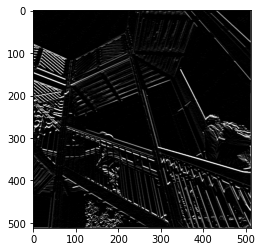

In [231]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()